In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
(training_set,validation_set),dataset_info = tfds.load('tf_flowers',
                                                      split=['train[:70%]','train[70%:]'],
                                                      with_info=True,
                                                      as_supervised=True)

In [3]:
num_classes = dataset_info.features['label'].num_classes

In [4]:
num_classes

5

In [5]:
num_training_examples = 0
num_validation_examples = 0
for example in training_set:
    num_training_examples += 1
for example in validation_set:
    num_validation_examples += 1

In [6]:
num_training_examples

2569

In [7]:
num_validation_examples

1101

In [8]:
print("Total number of classes: {}".format(num_classes))
print("Total numbers of Training Images: {}".format(num_training_examples))
print("Total numbers of validation Images: {}\n".format(num_validation_examples))

Total number of classes: 5
Total numbers of Training Images: 2569
Total numbers of validation Images: 1101



In [9]:
for i,examples in enumerate(training_set.take(5)):
    print("Image {} shape: {} label: {}".format(i+1,examples[0].shape,examples[1]))

Image 1 shape: (333, 500, 3) label: 2
Image 2 shape: (212, 320, 3) label: 3
Image 3 shape: (240, 320, 3) label: 3
Image 4 shape: (240, 320, 3) label: 4
Image 5 shape: (317, 500, 3) label: 3


In [10]:
IMG_RES = 224
def format_image(image,label):
    image = tf.image.resize(image,(IMG_RES,IMG_RES))/255.0
    return image, label

In [11]:
BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [12]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [13]:
feature_extractor = hub.KerasLayer(URL,input_shape=(IMG_RES,IMG_RES,3))

In [14]:
feature_extractor.trainable = False

In [15]:
model = tf.keras.Sequential([
    feature_extractor,
    layers.Dense(num_classes)
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [18]:
Epochs = 6
history = model.fit(train_batches,epochs=Epochs,
                   validation_data=validation_batches)

Epoch 1/6
81/81 [==============================] - 36s 149ms/step - loss: 0.7780 - accuracy: 0.7162 - val_loss: 0.4489 - val_accuracy: 0.8574
Epoch 2/6
81/81 [==============================] - 8s 98ms/step - loss: 0.3787 - accuracy: 0.8774 - val_loss: 0.3569 - val_accuracy: 0.8756
Epoch 3/6
81/81 [==============================] - 8s 98ms/step - loss: 0.2974 - accuracy: 0.9031 - val_loss: 0.3164 - val_accuracy: 0.8883
Epoch 4/6
81/81 [==============================] - 8s 98ms/step - loss: 0.2448 - accuracy: 0.9260 - val_loss: 0.3201 - val_accuracy: 0.8919
Epoch 5/6
81/81 [==============================] - 8s 99ms/step - loss: 0.2134 - accuracy: 0.9377 - val_loss: 0.2900 - val_accuracy: 0.8992
Epoch 6/6
81/81 [==============================] - 8s 99ms/step - loss: 0.1863 - accuracy: 0.9459 - val_loss: 0.2831 - val_accuracy: 0.9037


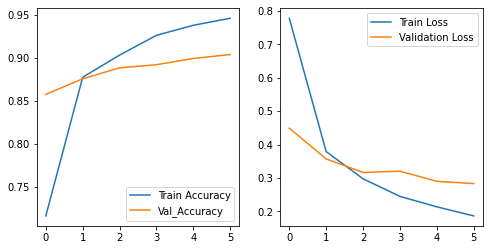

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(Epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Train Accuracy')
plt.plot(epochs_range,val_acc,label='Val_Accuracy')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Train Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc=0)
plt.show()

In [20]:
class_names = np.array(dataset_info.features['label'].names)

In [21]:
class_names

array(['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'],
      dtype='<U10')

In [22]:
image_batch,label_batch = next(iter(train_batches))

In [23]:
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

In [24]:
predicted_batch = model.predict(image_batch)

In [25]:
predicted_batch = tf.squeeze(predicted_batch).numpy()

In [26]:
predicted_batch

array([[ -3.639917  ,  -3.0076654 ,   3.1906114 ,  -2.7482162 ,
         -0.85455996],
       [ -1.1813906 ,  -3.4945526 ,  -0.30480346,   1.2328199 ,
         -3.5872366 ],
       [ -0.6206377 ,   3.778514  ,  -5.356579  ,  -1.7054996 ,
         -6.4370933 ],
       [  6.5406017 ,  -2.3495946 ,  -5.953065  ,  -4.400997  ,
         -5.21199   ],
       [ -3.1628923 ,  -4.064032  ,  -0.8724991 ,  -3.7909074 ,
         -2.5793605 ],
       [  3.876904  ,  -2.9573584 ,  -5.437279  ,  -3.326311  ,
         -5.262478  ],
       [  7.2693624 ,  -2.9943857 ,  -4.9615607 ,  -4.66127   ,
         -4.7069693 ],
       [ -8.256667  ,  -5.1525    ,   0.8521107 ,  -1.5982039 ,
          4.336466  ],
       [  3.8462722 ,  -1.673681  ,  -5.4090953 ,  -2.5730581 ,
         -3.8491158 ],
       [  0.32950103,   3.0694933 ,  -5.170066  ,  -0.6241008 ,
         -5.986924  ],
       [ -6.0023823 ,  -3.6548102 ,   0.49822208,  -3.0595794 ,
          1.3570163 ],
       [  6.4892635 ,  -4.3950753 ,  -6.438

In [27]:
predicted_ids = np.argmax(predicted_batch,axis=-1)

In [28]:
predicted_ids

array([2, 3, 1, 0, 2, 0, 0, 4, 0, 1, 4, 0, 4, 3, 2, 3, 2, 3, 0, 1, 4, 0,
       4, 2, 3, 4, 1, 0, 0, 0, 0, 4], dtype=int64)

In [29]:
predicted_class_names = class_names[predicted_ids]

In [30]:
predicted_class_names

array(['tulips', 'sunflowers', 'daisy', 'dandelion', 'tulips',
       'dandelion', 'dandelion', 'roses', 'dandelion', 'daisy', 'roses',
       'dandelion', 'roses', 'sunflowers', 'tulips', 'sunflowers',
       'tulips', 'sunflowers', 'dandelion', 'daisy', 'roses', 'dandelion',
       'roses', 'tulips', 'sunflowers', 'roses', 'daisy', 'dandelion',
       'dandelion', 'dandelion', 'dandelion', 'roses'], dtype='<U10')

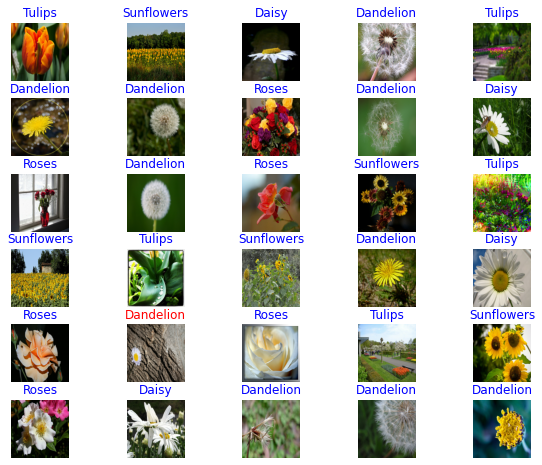

In [31]:
plt.figure(figsize=(10,8))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n]==label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(),color=color)
    plt.axis('off')